In [1]:
# Tarefa 1 - Estrutura e Dinamica da Galaxia (Versao Melhorada)
# Importando o pacote Astropy para leer os dados do catalogo
from astropy.io import ascii
tbl = ascii.read('Coordinates_Arreglado.csv')
tbl

ID,Name,RA (2000),DEC,L,B,R_Sun,R_gc,X,Y,Z
str9,str11,str11,str11,float64,float64,float64,float64,float64,float64,float64
--,--,--,--,--,--,--,--,--,--,--
NGC 104,47 Tuc,00 24 05.67,-72 04 52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
NGC 288,--,00 52 45.24,-26 34 57.4,152.3,-89.38,8.9,12.0,-0.1,0.0,-8.9
NGC 362,--,01 03 14.26,-70 50 55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
Whiting 1,--,02 02 57,-03 15 10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
NGC 1261,--,03 12 16.21,-55 12 58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9
Pal 1,--,03 33 20.04,+79 34 51.8,130.06,19.03,11.1,17.2,-6.8,8.1,3.6
AM 1,E 1,03 55 02.3,-49 36 55,258.34,-48.47,123.3,124.6,-16.5,-80.1,-92.3
Eridanus,--,04 24 44.5,-21 11 13,218.1,-41.33,90.1,95.0,-53.2,-41.7,-59.5


In [2]:
# Colocando el nombre de la columna dentro de tbl[' '] puedo seleccionar la lista de datos con
# los cuales quiero trabajar
tbl['RA  (2000)']

--
00 24 05.67
00 52 45.24
01 03 14.26
02 02 57
03 12 16.21
03 33 20.04
03 55 02.3
04 24 44.5
04 46 05.91
05 14 06.76


In [3]:
# El subpaquete coordinates (aka coord) sirve para atribuir propiedades al tipo de dato con el
# cual estoy trabajando (ej: Coordenadas ...)
# Units aplica la unidad respectiva al dato (ej: horas, radianes, grados)
import astropy.coordinates as coord
import astropy.units as u

first_row = tbl[1] # get the first (0th) row
ra = coord.Angle(first_row['RA  (2000)'],unit=u.hour) # create an Angle object
ra.degree # convert to degrees

6.023624999999999

In [4]:
print(tbl['RA  (2000)'])

 RA  (2000)
-----------
         --
00 24 05.67
00 52 45.24
01 03 14.26
   02 02 57
03 12 16.21
03 33 20.04
 03 55 02.3
 04 24 44.5
04 46 05.91
        ...
19 53 46.49
20 06 04.69
20 34 11.37
20 53 27.70
21 01 29.38
21 29 58.33
21 33 27.02
21 40 22.12
21 46 38.84
23 06 44.44
23 08 26.63
Length = 158 rows


In [5]:
# Convirtiendo datos de ascención recta  a unidades horas y declinación a unidades de grados
ra = coord.Angle(tbl['RA  (2000)'],u.hour)
ra.degree
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(tbl['DEC'],u.degree)

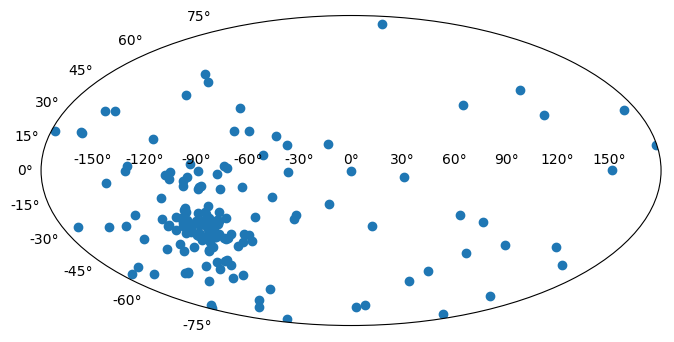

In [6]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
# Definiendo configuraciones para generar la grafica
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='mollweide')
ax.scatter(ra.radian,dec.radian)

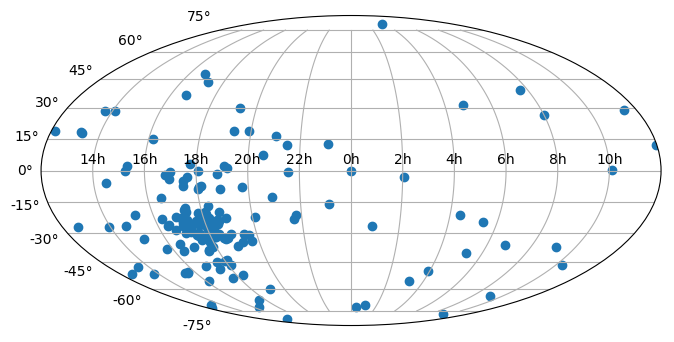

In [7]:
# Renombrando el eje horizontal del grafico en terminos de horas
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='mollweide')
ax.scatter(ra.radian,dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [8]:
# Calculo de X, Y y Z de cada aglomerado
# En este caso utilizamos el valor de la distancia al Sol junto con los valores de l (logitud
# galactica) y b (latitud galactica) de cada cumulo
import numpy as np
Dsun = tbl['R_Sun']
b = coord.Angle(tbl['B'],u.degree)
l = coord.Angle(tbl['L'],u.degree)
Xcal = Dsun*np.cos(l.radian)*np.cos(b.radian)
Ycal = Dsun*np.cos(b.radian)*np.sin(l.radian)
Zcal = Dsun*np.sin(b.radian)

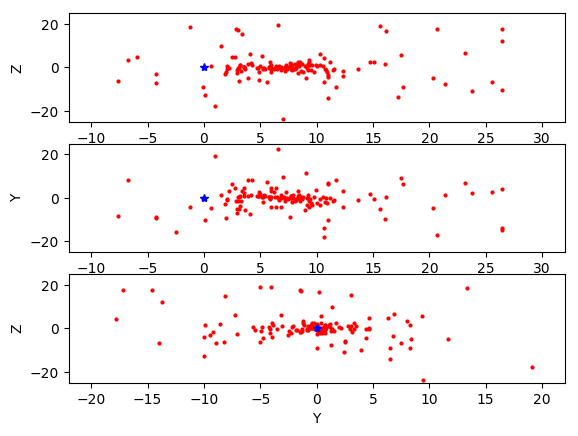

In [9]:
# Plot de las posiciones de cada cumulo respecto a diferentes planos
from mpl_toolkits.mplot3d import Axes3D

plt.subplot(311)
plt.plot(Xcal,Zcal,'ro',ms=2)
plt.plot(0,0,'b*',ms=6)
#plt.axhline()
plt.xlim(-12,32)
plt.ylim(-25,25)
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(312)
plt.plot(Xcal,Ycal,'ro',ms=2)
plt.plot(0,0,'b*',ms=6)
plt.xlim(-12,32)
plt.ylim(-25,25)
plt.xlabel('X')
plt.ylabel('Y')
plt.subplot(313)
plt.plot(Ycal,Zcal,'ro',ms=2)
plt.plot(0,0,'b*',ms=6)
plt.xlim(-22,22)
plt.ylim(-25,25)
plt.xlabel('Y')
plt.ylabel('Z')

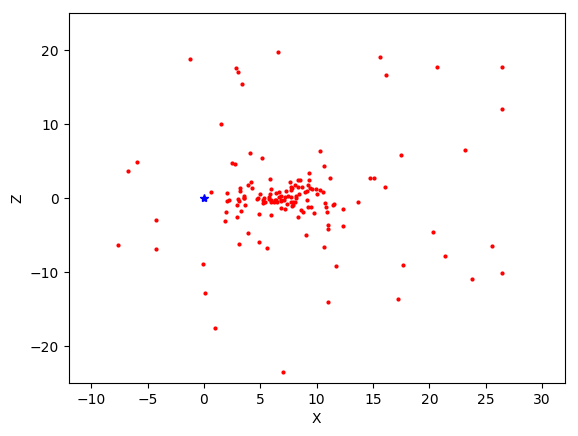

In [10]:
# Plot XZ de los cumulos
plt.plot(Xcal,Zcal,'ro',ms=2)
plt.plot(0,0,'b*',ms=6)
#plt.axhline()
plt.xlim(-12,32)
#plt.xlim(0,12)
plt.ylim(-25,25)
plt.xlabel('X')
plt.ylabel('Z')

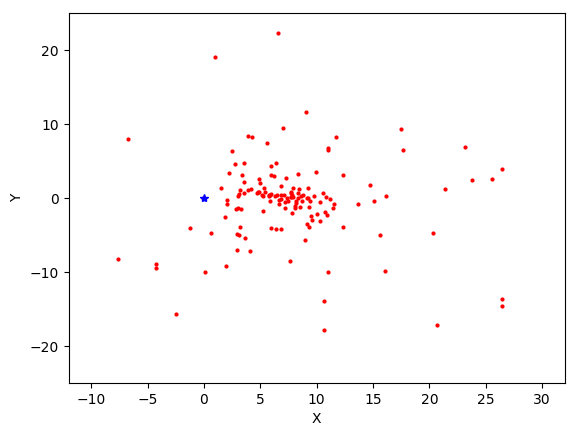

In [11]:
# Plot XY de los cumulos
plt.plot(Xcal,Ycal,'ro',ms=2)
plt.plot(0,0,'b*',ms=6)
plt.xlim(-12,32)
plt.ylim(-25,25)
plt.xlabel('X')
plt.ylabel('Y')

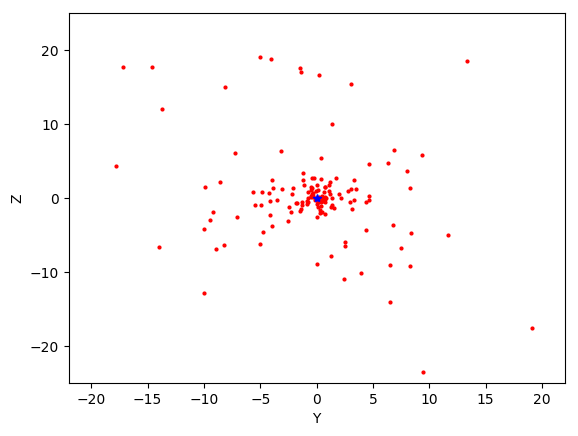

In [12]:
# Plot YZ de los cumulos
plt.plot(Ycal,Zcal,'ro',ms=2)
plt.plot(0,0,'b*',ms=6)
plt.xlim(-22,22)
plt.ylim(-25,25)
plt.xlabel('Y')
plt.ylabel('Z')

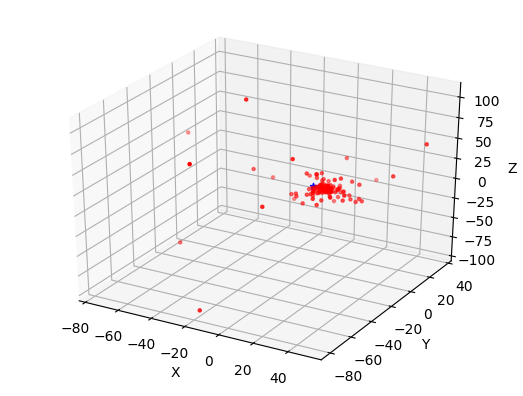

In [13]:
# Plot 3D de las posiciones de los cumulos (Distribucion Espacial)
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

#for i in range(0,len(X)):
ax.scatter(Xcal, Ycal, Zcal, c='r', marker='o',s=5)
    
ax.scatter(0,0,0,c='b',marker='*',s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [14]:
# Leyendo los datos correspondientes a las metalicidades de los cumulos
Met = ascii.read('MetallicPhotom_Arreglado.csv')
Met

ID,[Fe/H],wt,E(B-V),V_HB,(m-M)V,V_t,"M_V,t",U-B,B-V,V-R,V-I,spt,ellip
str9,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64
--,--,--,--,--,--,--,--,--,--,--,--,--,--
NGC 104,-0.72,10,0.04,14.06,13.37,3.95,-9.42,0.37,0.88,0.53,1.14,G4,0.09
NGC 288,-1.32,3,0.03,15.44,14.84,8.09,-6.75,0.08,0.65,0.45,0.94,--,--
NGC 362,-1.26,5,0.05,15.44,14.83,6.4,-8.43,0.16,0.77,0.49,1.01,F9,0.01
Whiting 1,-0.7,1,0.03,18.18,17.49,15.03,-2.46,--,--,--,--,--,--
NGC 1261,-1.27,3,0.01,16.7,16.09,8.29,-7.8,0.13,0.72,0.45,0.93,F7,0.07
Pal 1,-0.65,2,0.15,16.4,15.7,13.18,-2.52,--,0.96,--,--,--,0.22
AM 1,-1.7,2,0.0,21.0,20.45,15.72,-4.73,--,0.72,--,--,--,--
Eridanus,-1.43,4,0.02,20.42,19.83,14.7,-5.13,--,0.79,--,--,--,--


In [15]:
# Creando Tabla para almacenar datos X, Y, Z y [Fe/H]
from astropy.table import Table
Pos =  Table()
Pos['Xcal'] = Xcal
Pos['Ycal'] = Ycal
Pos['Zcal'] = Zcal
Pos['Fe_H'] = Met['[Fe/H]']
print Pos

      Xcal             Ycal            Zcal       Fe_H
---------------- --------------- --------------- -----
              --              --              --    --
   1.86895334437  -2.58280671172  -3.17586569087 -0.72
-0.0852681772104 0.0447667938606  -8.89947893262 -1.32
   3.10995994661  -5.06903385131  -6.21233007371 -1.26
  -13.9201572279   4.73338653496  -26.2646963558  -0.7
 0.0943251596259  -10.0079139419  -12.8655649427 -1.27
  -6.75341751545   8.03131432591   3.61930132214 -0.65
  -16.5218482425  -80.0624244351  -92.3034491459  -1.7
  -53.2422551446  -41.7472606769  -59.5015839545 -1.43
  -26.4938544677   4.41929136017  -4.28783620471 -1.42
             ...             ...             ...   ...
   2.18623070325   3.33455598608 -0.318012087631 -0.78
   17.6553776626   6.53092250808  -9.07990587975 -1.29
   9.06673487089   11.6467337759  -5.05053572744 -1.47
   11.6981904665   8.23994073955  -9.17909126319 -1.42
   17.1744576019   34.8570229116  -13.6918209096 -1.52
   3.90386

In [16]:
# Filtrando los datos por valor de metalicidad
filt = Pos['Fe_H']<-0.8
filt2 = Pos['Fe_H']>-0.8
Pos[filt]

Xcal,Ycal,Zcal,Fe_H
float64,float64,float64,float64
-0.0852681772104,0.0447667938606,-8.89947893262,-1.32
3.10995994661,-5.06903385131,-6.21233007371,-1.26
0.0943251596259,-10.0079139419,-12.8655649427,-1.27
-16.5218482425,-80.0624244351,-92.3034491459,-1.7
-53.2422551446,-41.7472606769,-59.5015839545,-1.43
-26.4938544677,4.41929136017,-4.28783620471,-1.42
-4.26398802041,-8.94365362207,-6.94546370304,-1.18
-7.63543960347,-8.25418983097,-6.32284843216,-1.6
-4.28374493186,-9.45662171849,-2.97688344282,-1.92


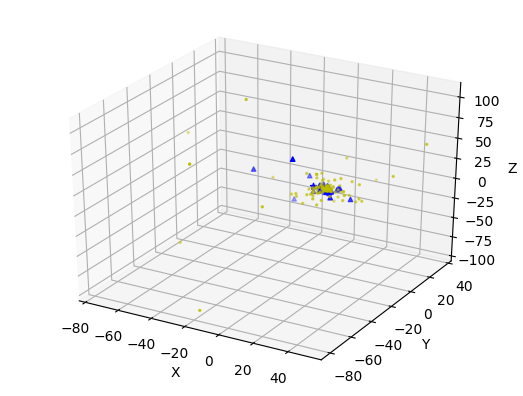

In [17]:
# Plot y clasificacion de cumulos ricos y pobres en metales
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

#for i in range(0,len(X)):
ax.scatter(Pos['Xcal'][filt], Pos['Ycal'][filt], Pos['Zcal'][filt], c='y', marker='o',s=2)
ax.scatter(Pos['Xcal'][filt2], Pos['Ycal'][filt2], Pos['Zcal'][filt2], c='bk', marker='^',s=10)
    
ax.scatter(0,0,0,c='b',marker='*',s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

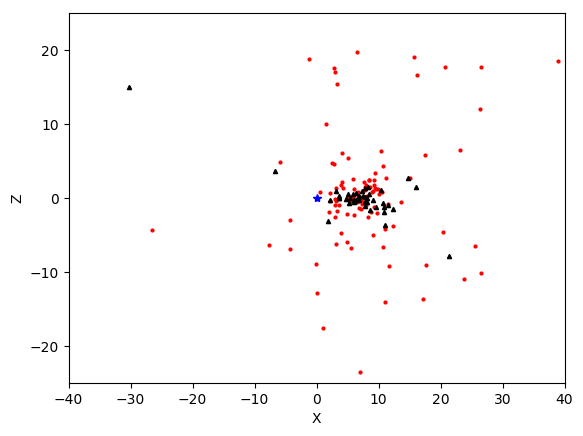

In [18]:
# Plot XZ de los cumulos filtrando valores de Metaicidad
plt.plot(Pos['Xcal'][filt], Pos['Zcal'][filt], 'ro',ms=2)
plt.plot(Pos['Xcal'][filt2], Pos['Zcal'][filt2], 'k^',ms=3)
plt.plot(0,0,'b*',ms=6)
plt.xlim(-40,40)
plt.ylim(-25,25)
plt.xlabel('X')
plt.ylabel('Z')

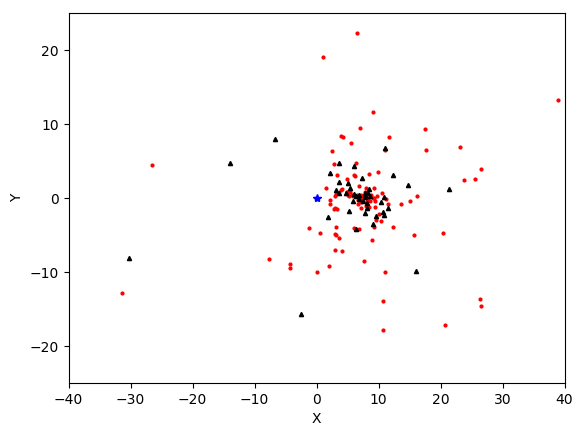

In [19]:
# Plot XY de los cumulos filtrando valores de Metaicidad
plt.plot(Pos['Xcal'][filt], Pos['Ycal'][filt], 'ro',ms=2)
plt.plot(Pos['Xcal'][filt2], Pos['Ycal'][filt2], 'k^',ms=3)
plt.plot(0,0,'b*',ms=6)
plt.xlim(-40,40)
plt.ylim(-25,25)
plt.xlabel('X')
plt.ylabel('Y')

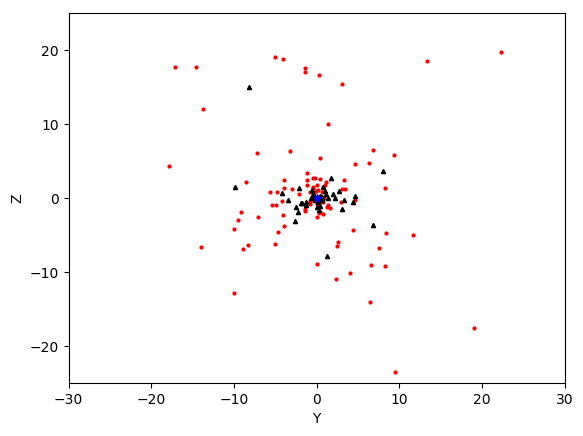

In [20]:
# Plot YZ de los cumulos filtrando valores de Metaicidad
plt.plot(Pos['Ycal'][filt], Pos['Zcal'][filt], 'ro',ms=2)
plt.plot(Pos['Ycal'][filt2], Pos['Zcal'][filt2], 'k^',ms=3)
plt.plot(0,0,'b*',ms=6)
plt.xlim(-30,30)
plt.ylim(-25,25)
plt.xlabel('Y')
plt.ylabel('Z')

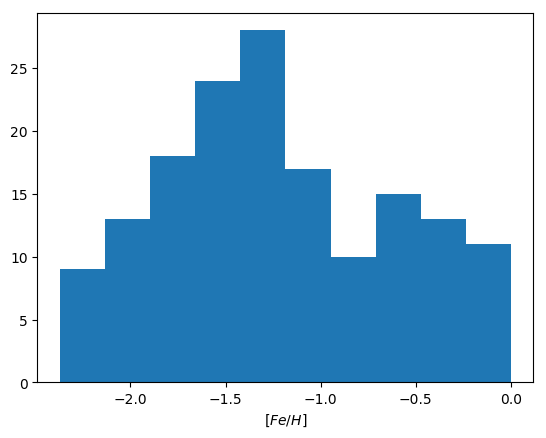

In [21]:
# Distribucion de Metalicidad de los cumulos 
histogram_example = plt.hist(Pos['Fe_H'])#bins = 12
plt.xlabel('$[Fe/H]$')
plt.show()

In [22]:
# Importando el paquete pandas para leer los datos y calcular promedios <X>, <Y>, <Z>
import pandas as pd
pos = pd.read_csv('Coordinates_Arreglado.csv')
print(pos.head())

          ID    Name   RA  (2000)          DEC       L      B  R_Sun  R_gc  \
0        NaN     NaN          NaN          NaN     NaN    NaN    NaN   NaN   
1    NGC 104  47 Tuc  00 24 05.67  -72 04 52.6  305.89 -44.89    4.5   7.4   
2    NGC 288     NaN  00 52 45.24  -26 34 57.4  152.30 -89.38    8.9  12.0   
3    NGC 362     NaN  01 03 14.26  -70 50 55.6  301.53 -46.25    8.6   9.4   
4  Whiting 1     NaN     02 02 57    -03 15 10  161.22 -60.76   30.1  34.5   

      X    Y     Z  
0   NaN  NaN   NaN  
1   1.9 -2.6  -3.1  
2  -0.1  0.0  -8.9  
3   3.1 -5.1  -6.2  
4 -13.9  4.7 -26.3  


In [23]:
# Calculo de los valores medios para cada coordenada
Xmean = pos[['X']].mean()
Ymean = pos[['Y']].mean()
Zmean = pos[['Z']].mean()
print Xmean[0], Ymean[0], Zmean[0]

6.01401273885 -1.37770700637 1.14840764331


In [24]:
# Calculo del Centroide para el sistema de cumulos 
Centroid = np.sqrt(Xmean[0]**2+Ymean[0]**2+Zmean[0]**2)
Centroid

6.2757681548722966

In [25]:
# Calculo del Centroide excluyendo algunos cumulos
F = (pos['R_Sun']<40.0) #& abs((pos['Z']>2.5))
Cord = pos['X']
Xfmean = pos[F]['X'].mean()
Yfmean = pos[F]['Y'].mean()
Zfmean = pos[F]['Z'].mean()
#sigmaX = pos[F]['X'].std()
print Xfmean, Yfmean, Zfmean
#print sigmaX

7.10135135135 -0.547972972973 0.203378378378


In [26]:
# Calculo del Centroide excluyendo algunos cumulos
CentroidF = np.sqrt(Xfmean**2+Yfmean**2+Zfmean**2)
CentroidF

7.1253651246262644

In [27]:
# Estimacion de Ro
RgalCalc = np.sqrt(CentroidF**2+Dsun**2)
RgalCalc

--
8.42738560642
11.4009134792
11.1682956694
30.931873984
17.7893459171
13.1901792315
123.505711723
90.3813079578
28.1178026908
14.0421091065


In [28]:
# Otro intento para calcular R_gal
Rgcal2 = np.sqrt((Xcal-Xfmean)**2+(Ycal-Yfmean)**2+(Zcal-Zfmean)**2)
#Rgcal2 = np.sqrt(8.5**2+Dsun**2)
Rgcal2

--
6.55269621815
11.6129605142
8.80525478074
34.2104598235
17.5893768712
16.6501447581
124.250218064
94.3579073497
34.256131968
15.8355402719


In [29]:
# Imprimiendo valores calculados en el catalogo de Harris sobre la distancia al centro de la
# galaxia
pos['R_gc']

0        NaN
1        7.4
2       12.0
3        9.4
4       34.5
5       18.1
6       17.2
7      124.6
8       95.0
9       35.0
10      16.6
11      18.8
12      15.8
13      89.9
14      41.9
15      41.4
16      11.1
17       9.1
18      95.7
19       8.8
20     111.2
21      49.3
22      21.4
23       7.1
24      18.5
25      10.2
26       7.0
27      18.4
28      17.8
29       6.4
       ...  
128      2.7
129      4.9
130      5.5
131      2.2
132      4.9
133      3.5
134     18.9
135      2.4
136      2.6
137      5.0
138      5.2
139      4.8
140      9.2
141     15.6
142      6.4
143     21.4
144      3.9
145     19.4
146      8.2
147      6.7
148     14.7
149     12.8
150     12.9
151     38.5
152     10.4
153     10.4
154      7.1
155     15.8
156     26.9
157     25.3
Name: R_gc, dtype: float64

In [30]:
# Calculo de errores entre los calculos obtenidos y los datos de Harris
GalDistances = Table()
GalDistances['Rgc'] = pos['R_gc'][1:]
GalDistances['RgCalc'] = Rgcal2[1:]
GalDistances['Err'] = 100*abs((GalDistances['RgCalc']-GalDistances['Rgc'])/GalDistances['Rgc'])
F = GalDistances['Err'] < 15
print GalDistances[F]
#print GalDistances

 Rgc      RgCalc         Err      
----- ------------- --------------
  7.4 6.55269621815  11.4500511061
 12.0 11.6129605142  3.22532904851
  9.4 8.80525478074  6.32707680065
 34.5 34.2104598235 0.839246888519
 18.1 17.5893768712  2.82112225849
 17.2 16.6501447581  3.19683280153
124.6 124.250218064  0.28072386509
 95.0 94.3579073497 0.675887000302
 35.0  34.256131968  2.12533723421
 16.6 15.8355402719  4.60517908513
  ...           ...            ...
  6.7 6.28524383944  6.19039045608
 14.7 15.7377761843  7.05970193399
 12.8 13.4230107838  4.86727174825
 12.9  13.652439117  5.83286137238
 38.5 39.3453652464   2.1957538868
 10.4 10.7053993597  2.93653230469
 10.4 10.7188128396  3.06550807355
  7.1 7.18014588915  1.12881534018
 15.8 16.3730092281  3.62664068414
 26.9 27.2236493032  1.20315726106
 25.3 25.7468207764  1.76609002514
Length = 102 rows


[ 45.  41.  17.   9.   8.   9.   7.   3.   2.   0.] [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.] <a list of 10 Patch objects>


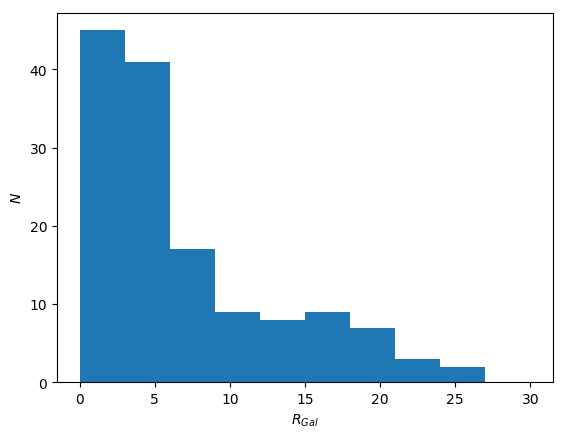

3.0


In [31]:
# Distribucion Espacial de los cumulos
# Histograma del numero de cumulos encontrados a diferentes intervalos de distancia
Select = tbl['R_Sun']<30.0
(n,bins,patches) = plt.hist(tbl[Select]['R_gc'],range=(0,30))
print n, bins, patches
plt.xlabel('$R_{Gal}$')
plt.ylabel('$N$')
plt.show()
width = bins[2]-bins[1]
print width

[  1.5   4.5   7.5  10.5  13.5  16.5  19.5  22.5  25.5  28.5] [ 45.  41.  17.   9.   8.   9.   7.   3.   2.   0.]


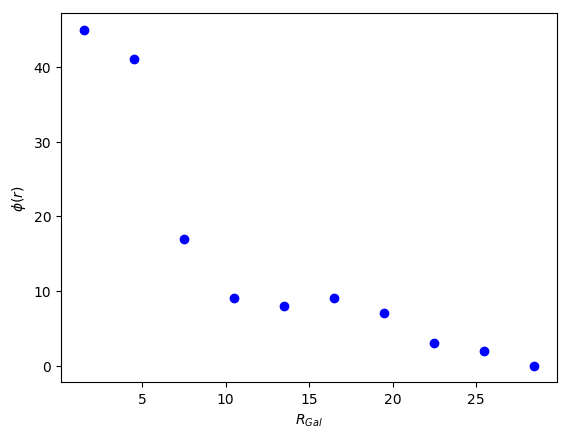

In [32]:
# Extrayendo puntos de referencia del histograma
X = bins[1:] - width/2
#plt.plot(bins[1:],n,'bo')
plt.plot(X,n,'bo')
plt.xlabel('$R_{Gal}$')
plt.ylabel('$\phi(r)$')
print X,n

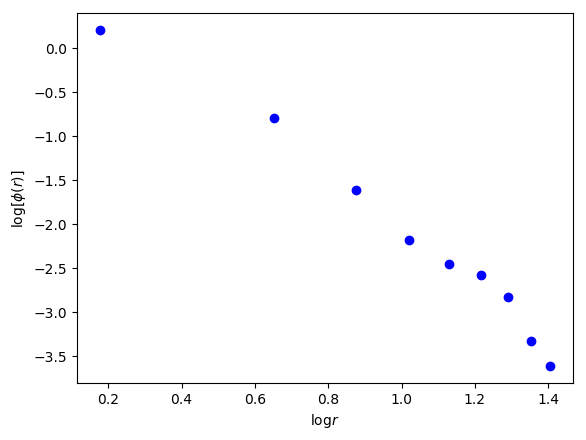

In [33]:
# Linealizando los puntos de referencia
redu = n > 0.0
xi = np.log10(X[redu])
xa = n[redu]/(4*np.pi*X[redu]**2)
y = np.log10(xa)

plt.plot(xi,y,'bo')
plt.xlabel('$\log r$')
plt.ylabel('$\log[\phi(r)]$')

-3.05126043806 0.958679390757 -0.988544609276


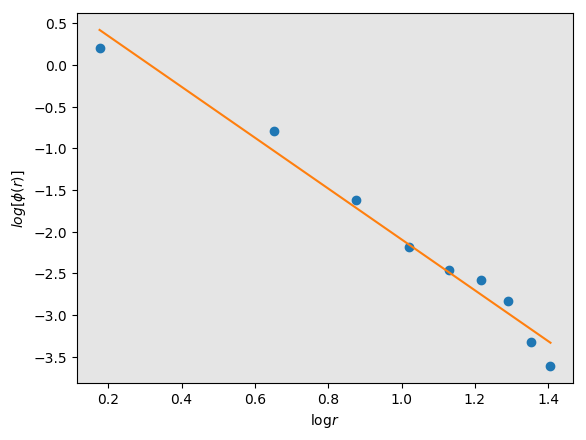

In [34]:
# Linealizando los puntos de referencia
from numpy import arange,array,ones
from scipy import stats as st
from matplotlib import pylab
 
#xi = arange(0,9)
#A = array([ xi, ones(9)])

# (Almost) linear sequence
#y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]


slope, intercept, r_value, p_value, std_err = st.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
#pylab.title('Linear Fit with Matplotlib')
ax = plt.gca()
#ax.set_axis_bgcolor((0.898, 0.898, 0.898))
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
#print line
print slope, intercept, r_value
plt.xlabel('$\log r$')
plt.ylabel('$log [\phi(r)]$')

4.34852934538


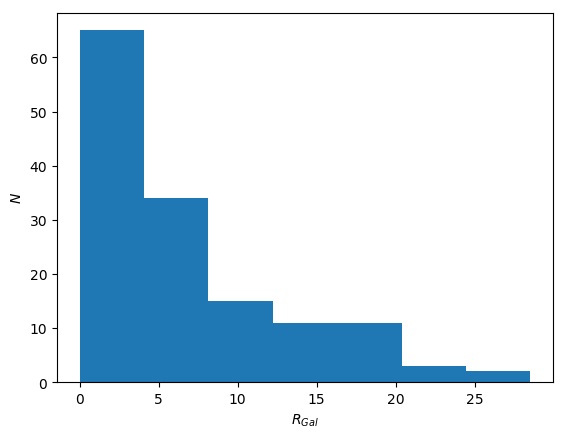

In [35]:
# Complemento Tarefa 01
from astropy import stats
from astropy import visualization
#stats.freedman_bin_width(tbl['R_gc'])
#stats.histogram(tbl['R_gc'],bins='freedman')
Width = stats.scott_bin_width(tbl[Select]['R_gc'])
(N,Bins,Patches) = visualization.hist(tbl[Select]['R_gc'],bins='scott',range=(0,30))
plt.xlabel('$R_{Gal}$')
plt.ylabel('$N$')
print Width
#print tbl[Select]['R_gc']
#print N

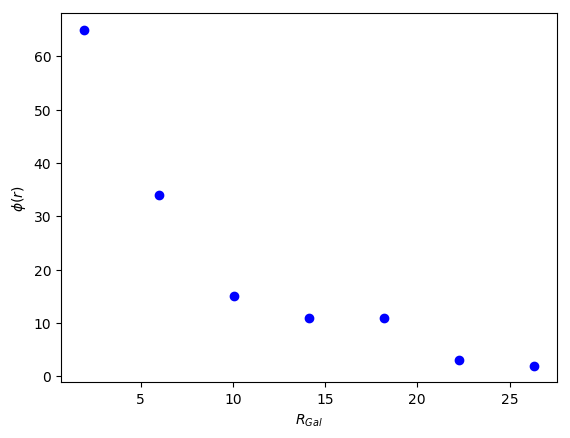

In [36]:
Horiz = Bins[1:] - Width/2
#plt.plot(bins[1:],n,'bo')
plt.plot(Horiz,N,'bo')
plt.xlabel('$R_{Gal}$')
plt.ylabel('$\phi(r)$')
#print Horiz,N

[ 0.2790016   0.77644222  1.0022432   1.1500541   1.26013068  1.34787298
  1.42083311] [ 0.15570029 -1.12061538 -1.927605   -2.35792538 -2.57807855 -3.31783458
 -3.63984609]


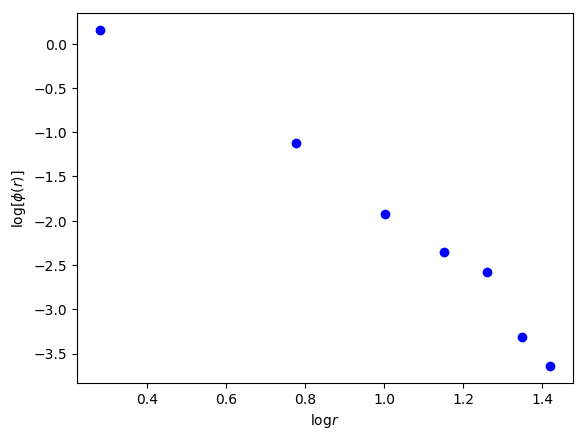

In [37]:
Redu = N > 0.0
horiz_i = np.log10(Horiz[Redu])
horiz_a = N[Redu]/(4*np.pi*Horiz[Redu]**2)
vert = np.log10(horiz_a)

plt.plot(horiz_i,vert,'bo')
plt.xlabel('$\log r$')
plt.ylabel('$\log[\phi(r)]$')

print horiz_i , vert

-3.23824319139 1.23537063124 -0.987098999626 0.234901177286


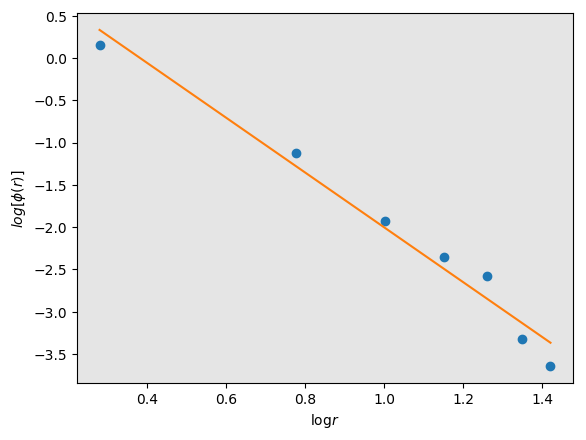

In [38]:
# Linealizando los puntos de referencia

Slope, Intercept, R_value, P_value, Std_Err = st.linregress(horiz_i,vert)
Line = Slope*horiz_i+Intercept

plt.plot(horiz_i,vert,'o', horiz_i, Line)
#pylab.title('Linear Fit with Matplotlib')
ax = plt.gca()
#ax.set_axis_bgcolor((0.898, 0.898, 0.898))
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
#print line
print Slope, Intercept, R_value, Std_Err
plt.xlabel('$\log r$')
plt.ylabel('$log [\phi(r)]$')

In [39]:
# Segunda Parte da Tarefa (Calculo de cos(Psi_i))
Numerador = 8*np.cos(b.radian)*np.sin(l.radian)
D1 = Dsun*np.cos(b.radian)*np.cos(l.radian)-8
D2 = Dsun*np.cos(b.radian)*np.sin(l.radian)
Denominador = D1**2 + D2**2
cosPsi = Numerador[1:158]/np.sqrt(Denominador[1:158])
print cosPsi

     R_Sun      
----------------
 -0.690177211058
0.00497685383239
 -0.669487753064
 0.0560990367331
 -0.385130738586
  0.344589309774
-0.0620377408986
-0.0500115928658
 0.0373763263031
 -0.389568365115
             ...
   0.99506651846
  0.214457695322
  0.510682953908
  0.429330070839
  0.187779399254
  0.691020595341
  0.661608208502
   0.62812047656
  0.381770880167
  0.288708254094
  0.302496098185
Length = 157 rows


In [40]:
# Leyendo los datos correspondientes a las velocidades de los cumulos
Vel = pd.read_csv('VelocStrucParam_Arreglado.csv')
Vel

,ID,v_r,+/-,v_LSR,sig_v,+/-.1,c,r_c,r_h,mu_V,rho_0,lg(tc),lg(th)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NGC 104,-18.0,0.1,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
2,NGC 288,-45.4,0.2,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
3,NGC 362,223.5,0.5,214.0,6.4,0.3,1.76,c: 0.18,0.82,14.80,4.74,7.76,8.93
4,Whiting 1,-130.6,1.8,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
5,NGC 1261,68.2,4.6,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
6,Pal 1,-82.8,3.3,-76.2,NaN,NaN,2.57,0.01,0.46,20.93,3.51,4.06,7.76
7,AM 1,116.0,20.0,101.3,NaN,NaN,1.36,0.17,0.41,23.62,0.03,8.96,9.61
8,Eridanus,-23.6,2.1,-39.1,NaN,NaN,1.10,0.25,0.46,22.81,0.38,9.18,9.54
9,Pal 2,-133.0,57.0,-140.1,NaN,NaN,1.53,0.17,0.50,19.06,4.06,8.82,9.28


In [41]:
Vr = Vel['v_r']
V_r = Vr[1:158]
b1 = b[1:158].radian
l1 = l[1:158].radian

In [42]:
Vag_GSR = V_r + 8.5*np.cos(b1)*np.sin(l1) + 13.38*np.cos(b1)*np.sin(l1)
+ 6.49*np.cos(b1)*np.sin(l1)

array([-3.72498124,  0.03264455, -3.82535229,  1.02058733, -3.9847461 ,
        4.69578648, -4.21415357, -3.00710013,  1.05445592, -4.79705058,
       -4.1526893 , -5.68272916, -0.03790911, -1.5274426 , -6.36784619,
       -6.22177662, -5.67800685, -4.19233895, -6.36533305, -0.7695053 ,
       -2.11329067, -1.37497271, -5.48108691, -5.45486593, -4.56104681,
       -5.35278842, -0.52450407, -0.5118866 , -4.86560707,  0.85380305,
       -4.77011872, -3.45801338,  1.23040229, -1.29408468, -2.70980583,
       -4.83341409, -2.77157504,  0.06704904, -1.64312963,  0.29907777,
       -3.55977531, -3.4701288 , -3.38995522, -2.4661061 , -3.36088426,
        2.3121384 , -0.7807186 , -0.97930328, -4.19918437, -0.87709364,
       -1.95121777, -1.64953254,  0.35115223, -0.89303638,  4.20462984,
        4.74860458,  1.57622575, -2.30450124, -0.11893651,  1.5593739 ,
       -1.3703152 ,  1.91402036, -0.72088677, -0.34962646, -0.18406761,
        0.0144538 , -0.26699679, -0.46984785, -0.31768559,  4.94

In [43]:
Vag_GSR

1      -30.558180
2      -45.289944
3      210.603435
4     -127.159253
5       54.766064
6      -66.968905
7      101.792653
8      -33.737959
9     -129.445070
10     304.327509
11     191.799870
12     129.741585
13     -20.327805
14            NaN
15      12.831822
16      80.624272
17            NaN
18      69.266198
19     472.540295
20      71.905736
21            NaN
22     178.564499
23      53.821390
24     -62.390211
25    -110.076842
26     182.153927
27     -64.668282
28      42.274256
29     215.696382
30    -144.721539
          ...    
128   -111.127281
129   -142.574533
130    -37.703412
131    221.362075
132           NaN
133    -98.258766
134    143.374564
135     27.589275
136    -94.474478
137    -48.787160
138    -34.569337
139    -14.635466
140   -116.369605
141    167.215243
142    -14.377253
143    118.041145
144    177.771569
145    131.997242
146    -56.890187
147     -4.559979
148   -182.462843
149   -395.064709
150   -334.394712
151   -365.588552
152    -89

In [44]:
cosLambda = np.cos(b1)*np.sin(l1)
Vrot_num_i = cosPsi*(Vag_GSR*220*cosLambda)
#Vrot_dem_i = cosPsi**2
#Vrot_i = Vrot_num_i/Vrot_dem_i
#Vrot_i